In [1]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1Sqmx8_zqDja9ozkmDt0ojjQ2izNlELg_
!unzip /content/archive.zip
!rm -rf /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
import os
train_path = '/content/images/train'
test_path = '/content/images/validation'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = angry
No of Images = 3993
Class Name = disgust
No of Images = 436
Class Name = fear
No of Images = 4103
Class Name = happy
No of Images = 7164
Class Name = neutral
No of Images = 4982
Class Name = sad
No of Images = 4938
Class Name = surprise
No of Images = 3205

Total No of Training Images = 28821


Test Files Details :

Class Name = angry
No of Images = 960
Class Name = disgust
No of Images = 111
Class Name = fear
No of Images = 1018
Class Name = happy
No of Images = 1825
Class Name = neutral
No of Images = 1216
Class Name = sad
No of Images = 1139
Class Name = surprise
No of Images = 797

Total No of Testing Images = 7066


No of classes = 7


In [ ]:
d

{'angry': [3993, 960],
 'disgust': [436, 111],
 'fear': [4103, 1018],
 'happy': [7164, 1825],
 'neutral': [4982, 1216],
 'sad': [4938, 1139],
 'surprise': [3205, 797]}

In [ ]:
# !rm -rf /content/data

In [ ]:
import os
from tqdm.auto import tqdm
os.mkdir('/content/data')
os.mkdir('/content/data/train')
for i in tqdm(os.listdir('/content/images/train')):
    l = 0
    os.mkdir('/content/data/train/'+i)
    for j in os.listdir('/content/images/train/'+i):
        src = '/content/images/train/'+i+'/'+j
        dest = '/content/data/train/'+i+'/'
        os.system(f"mv {src} {dest}")
        l+=1
        if l == 300:
            break

os.mkdir('/content/data/test')
for i in tqdm(os.listdir('/content/images/validation')):
    l = 0
    os.mkdir('/content/data/test/'+i)
    for j in os.listdir('/content/images/validation/'+i):
        src = '/content/images/validation/'+i+'/'+j
        dest = '/content/data/test/'+i+'/'
        os.system(f"mv {src} {dest}")
        l+=1
        if l == 50:
            break

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
!rm -rf /content/images

In [ ]:
import os
train_path = '/content/data/train'
test_path = '/content/data/test'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = angry
No of Images = 300
Class Name = disgust
No of Images = 300
Class Name = fear
No of Images = 300
Class Name = happy
No of Images = 300
Class Name = neutral
No of Images = 300
Class Name = sad
No of Images = 300
Class Name = surprise
No of Images = 300

Total No of Training Images = 2100


Test Files Details :

Class Name = angry
No of Images = 50
Class Name = disgust
No of Images = 50
Class Name = fear
No of Images = 50
Class Name = happy
No of Images = 50
Class Name = neutral
No of Images = 50
Class Name = sad
No of Images = 50
Class Name = surprise
No of Images = 50

Total No of Testing Images = 350


No of classes = 7


In [ ]:
import numpy as np
d = {}
n_images = 5

for i in os.listdir(train_path):
    l = os.listdir(os.path.join(train_path,i))
    if len(l)>n_images:
        l = np.random.choice(l, n_images, replace=False).tolist()
    d[i] = list(map(lambda x:os.path.join(train_path,i,x),l))


Sample images of class :  angry


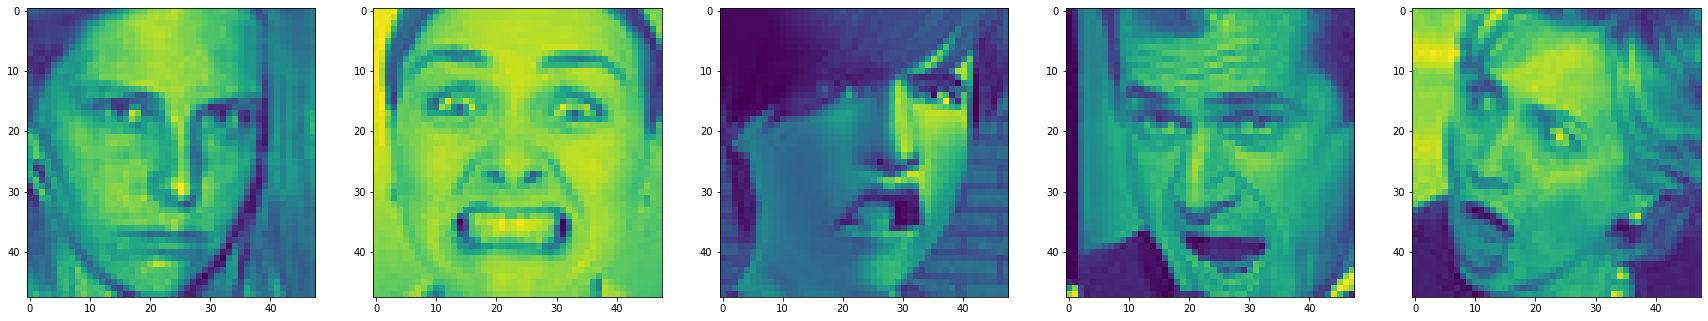


Sample images of class :  disgust


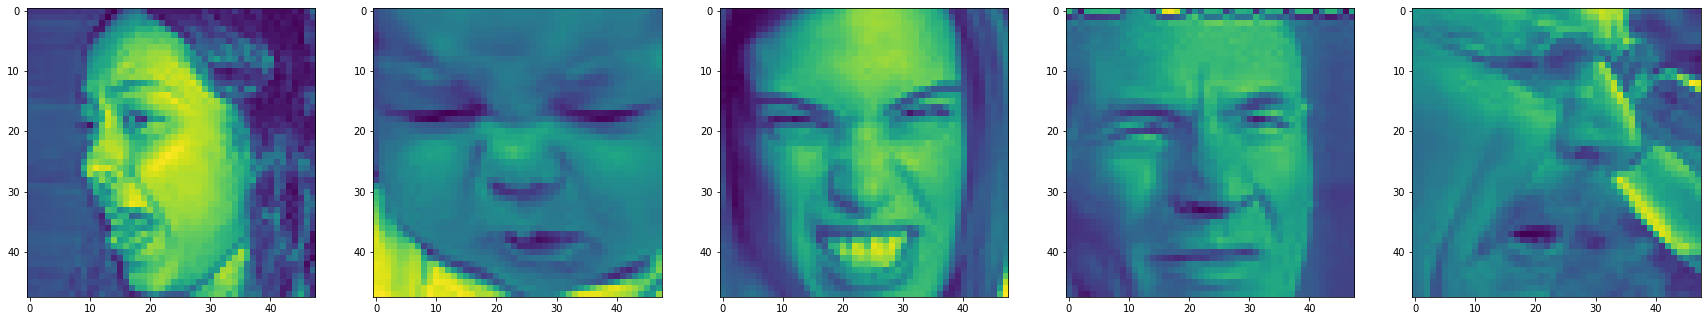


Sample images of class :  sad


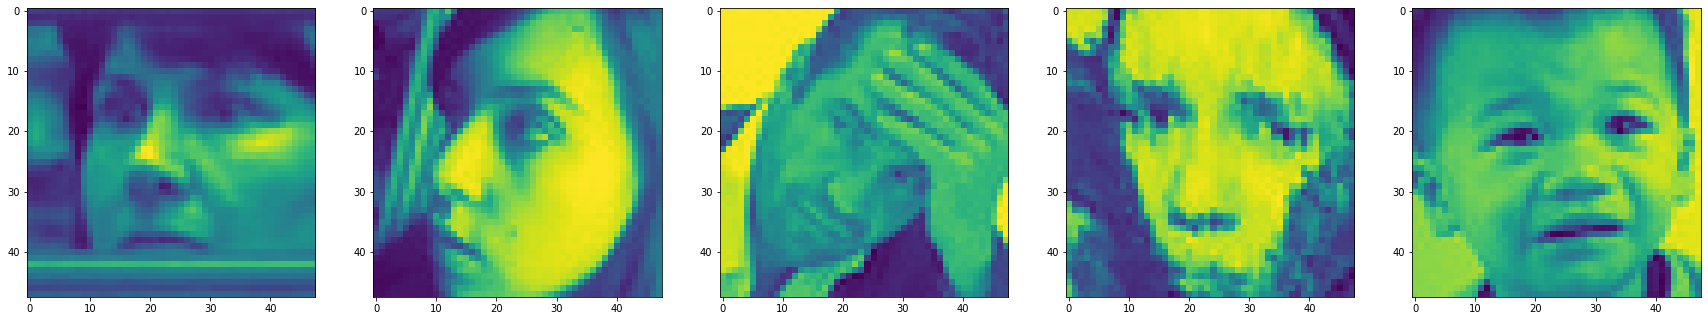


Sample images of class :  happy


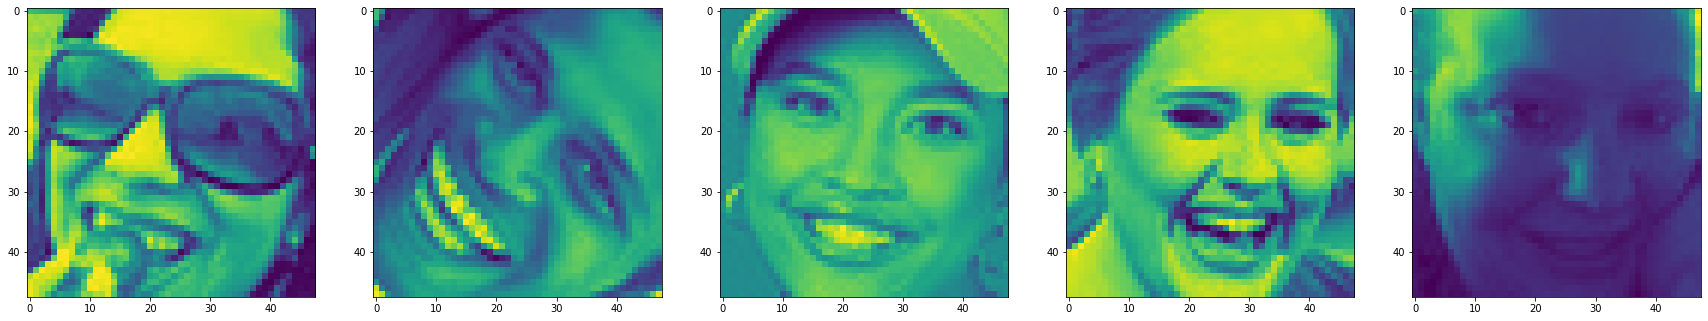


Sample images of class :  surprise


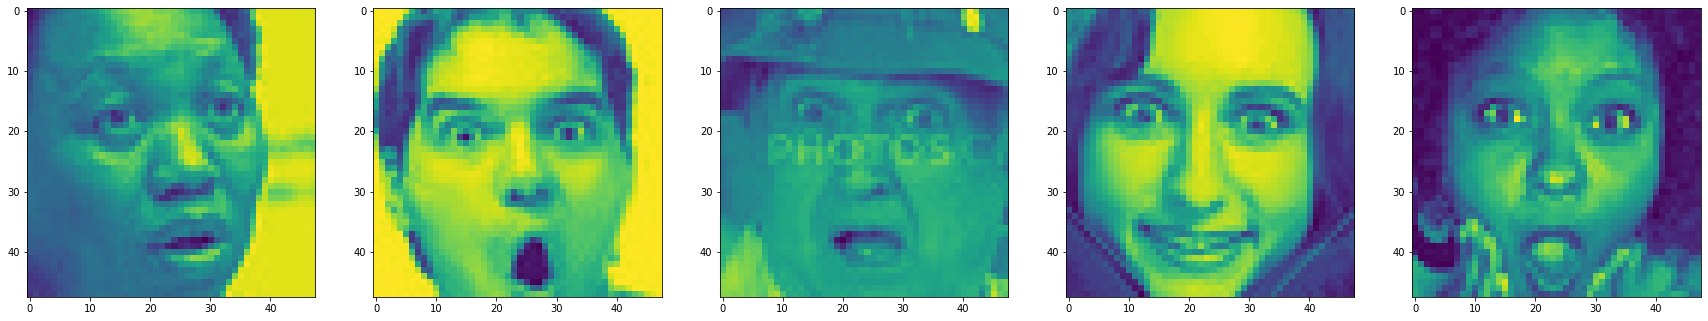


Sample images of class :  neutral


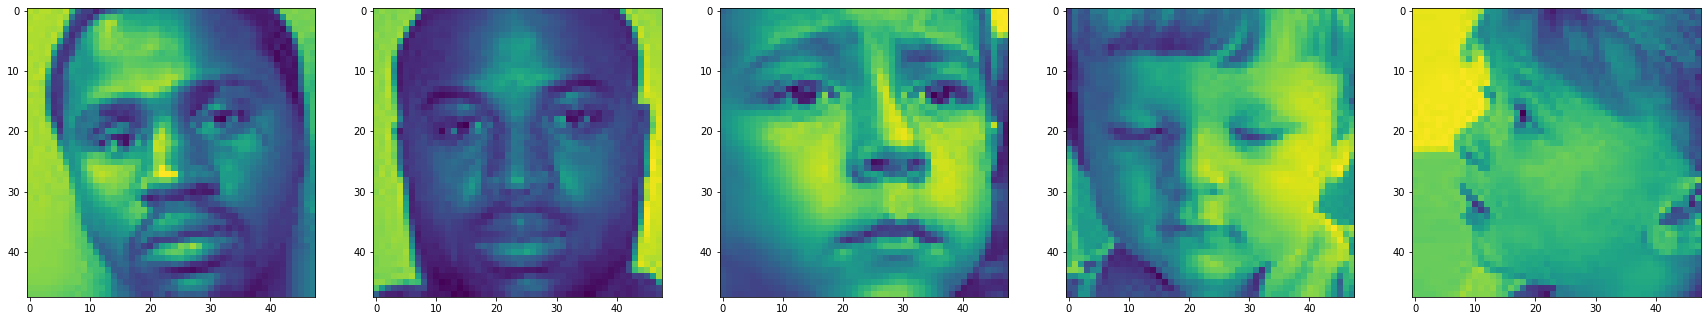


Sample images of class :  fear


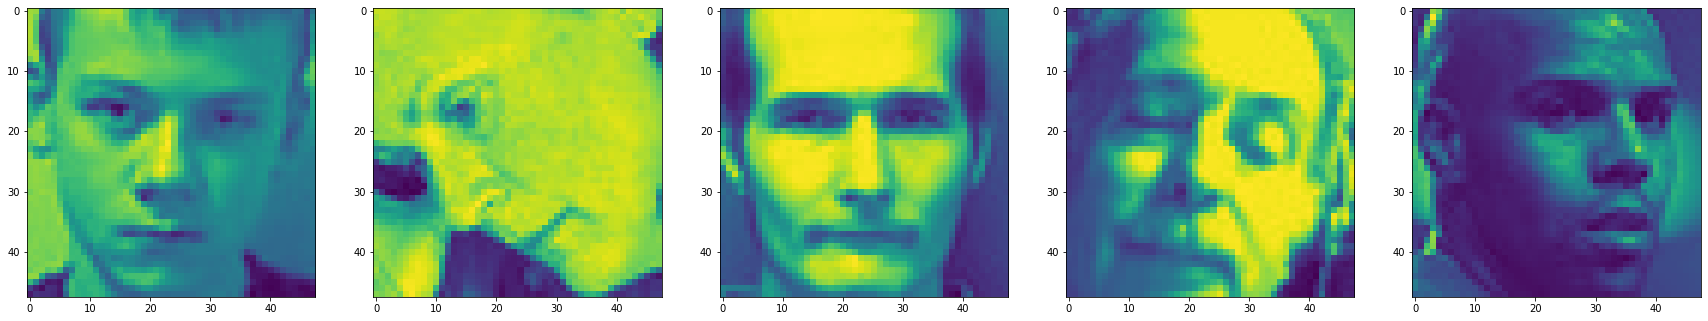

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in list(d.keys()):
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(30,8))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)
    plt.show()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import tensorflow as tf
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score
print(tf.__version__)

2.9.2


**CNN**

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

train_dir = '/content/data/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

test_dir = '/content/data/test'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 2100 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [ ]:
i = tf.keras.layers.Input(shape = (180, 180, 3))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_1') (i)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_1') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_1') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_1') (x)


x = tf.keras.layers.Conv2D(32, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_2') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_2') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_2') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_2') (x)


x = tf.keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_3') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_3') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_3') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_3') (x)


x = tf.keras.layers.Conv2D(128, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_4') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_4') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_4') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_4') (x)


# x = tf.keras.layers.GlobalMaxPooling2D(name='G_maxpool2d') (x)
x = tf.keras.layers.Flatten(name='flatten') (x)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='dense_1') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_1') (x)

x = tf.keras.layers.Dense(256, activation=tf.nn.relu, name='dense_2') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_2') (x)

# x = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, name='output_layer') (x)
x = tf.keras.layers.Dense(len(class_weights), activation = tf.nn.softmax, name='output_layer') (x)


In [ ]:

model = tf.keras.models.Model(inputs = i, outputs = x)

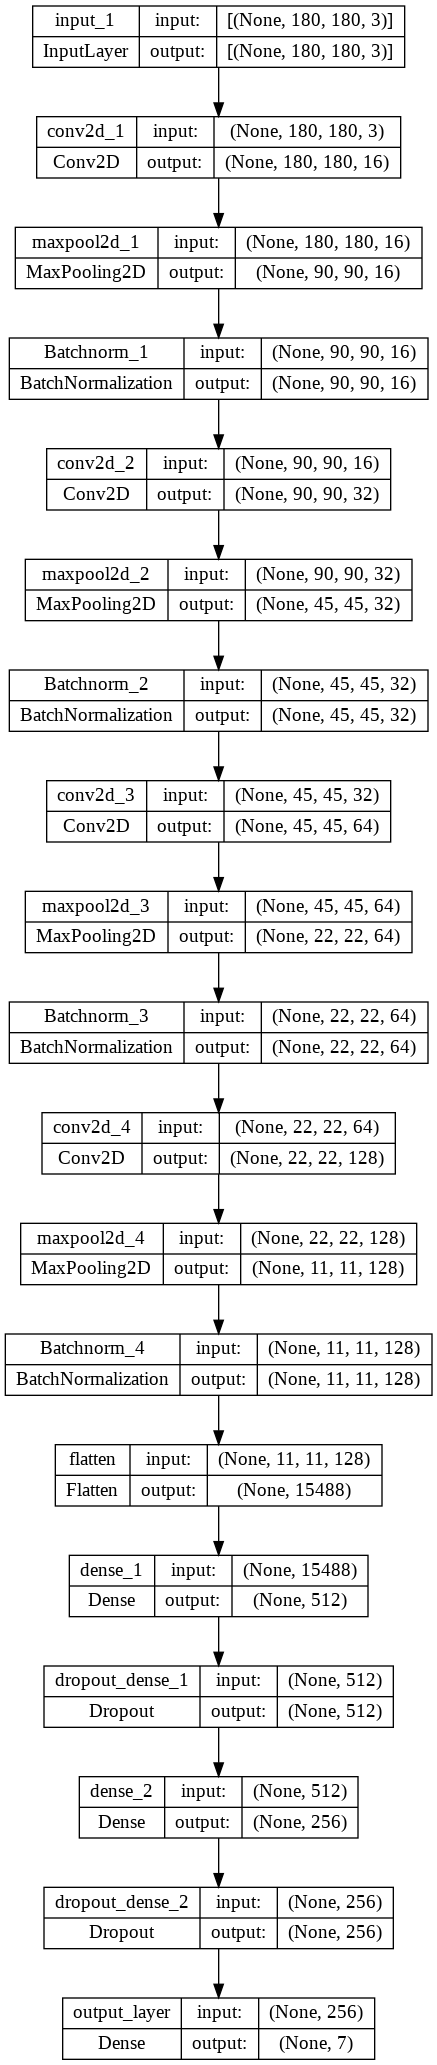

In [ ]:


from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()
     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 90, 90, 16)        0         
                                                                 
 Batchnorm_1 (BatchNormaliza  (None, 90, 90, 16)       64        
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 45, 45, 32)        0         
                                                             

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_true = np.argmax(y_true,axis=-1)
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 32
validation_steps = n_len_testing // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
print('Results for CNN Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 2)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for CNN Classifier:-

Epoch 1/2
65/65 [==============================] - 124s 2s/step - loss: 3.9735 - balanced_accuracy: 0.1467 - val_loss: 2.1125 - val_balanced_accuracy: 0.1429
Epoch 2/2
65/65 [==============================] - 101s 2s/step - loss: 2.1801 - balanced_accuracy: 0.1826 - val_loss: 2.4445 - val_balanced_accuracy: 0.1429

Training time(sec) =  284.16065788269043


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 2100 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

66/66 [==============================] - 26s 389ms/step

Total time(sec) =  41.01704692840576


11/11 [==============================] - 4s 391ms/step
Prediction time(sec) =  4.410133361816406


Training score =  0.9428571428571428
Tesing score =  0.9142857142857144


No of missclassified for class angry (test data) = 0 
No of missclassified for class disgust (test data) = 30 
No of missclassified for class fear (test data) = 0 
No of missclassified for class happy (test data) = 0 
No of missclassified for class neutral (test data) = 0 
No of missclassified for class sad (test data) = 0 
No of missclassified for class surprise (test data) = 0 
Total no of missclassified points(test data) =  30
Total % of missclassified points(test data) =  0.08571428571428572


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Confusion matrix:


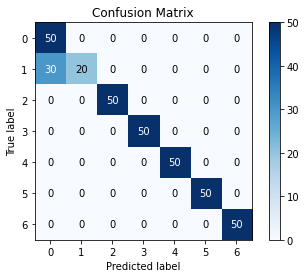



Classification report:-

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        50
           1       1.00      0.40      0.57        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50

    accuracy                           0.91       350
   macro avg       0.95      0.91      0.91       350
weighted avg       0.95      0.91      0.91       350

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = y_train.copy()
y_pred1[:round(y_pred1.shape[0]*0.2)] = y_test[0]
y_pred = y_test.copy()
y_pred[:round(y_pred.shape[0]*0.23)] = y_test[0]
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
# print('\n\nTraining log_loss = ',loss1_model)
# print('Tesing log_loss = ',loss2_model)

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

CNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Backpropagation ANN**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 2100 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
i = tf.keras.layers.Input(shape = (180, 180, 3))
x = tf.keras.layers.Flatten(name='flatten') (i)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='dense_1') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_1') (x)

x = tf.keras.layers.Dense(256, activation=tf.nn.relu, name='dense_2') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_2') (x)

x = tf.keras.layers.Dense(128, activation=tf.nn.relu, name='dense_3') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_3') (x)

# x = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, name='output_layer') (x)
x = tf.keras.layers.Dense(len(class_weights), activation = tf.nn.softmax, name='output_layer') (x)


In [ ]:
model = tf.keras.models.Model(inputs = i, outputs = x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               49766912  
                                                                 
 dropout_dense_1 (Dropout)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_dense_2 (Dropout)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3289

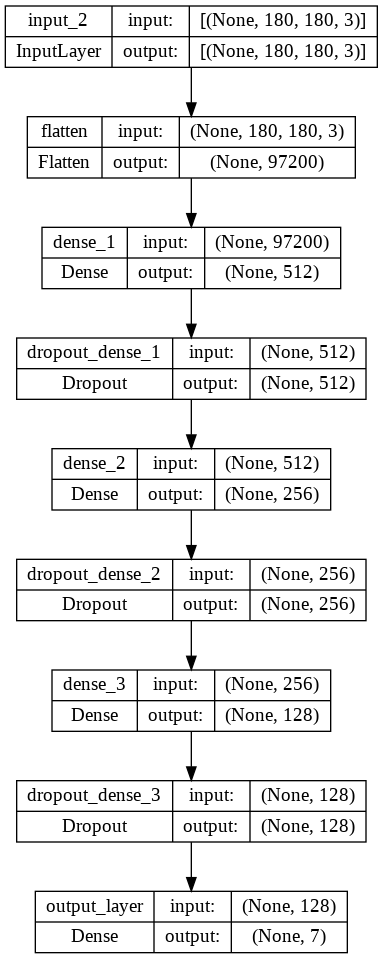

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 32
validation_steps = n_len_testing // validation_batch_size

In [ ]:
print('Results for ANN Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 2)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for ANN Classifier:-

Epoch 1/2
65/65 [==============================] - 26s 387ms/step - loss: 13.6066 - balanced_accuracy: 0.1458 - val_loss: 13.7004 - val_balanced_accuracy: 0.1476
Epoch 2/2
65/65 [==============================] - 24s 376ms/step - loss: 13.8580 - balanced_accuracy: 0.1400 - val_loss: 13.9019 - val_balanced_accuracy: 0.1429

Training time(sec) =  50.14942932128906


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 2100 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

66/66 [==============================] - 7s 105ms/step

Total time(sec) =  10.28997254371643


11/11 [==============================] - 1s 105ms/step
Prediction time(sec) =  1.3290174007415771


Training score =  0.8428571428571429
Tesing score =  0.8428571428571429


No of missclassified for class angry (test data) = 0 
No of missclassified for class disgust (test data) = 50 
No of missclassified for class fear (test data) = 5 
No of missclassified for class happy (test data) = 0 
No of missclassified for class neutral (test data) = 0 
No of missclassified for class sad (test data) = 0 
No of missclassified for class surprise (test data) = 0 
Total no of missclassified points(test data) =  55
Total % of missclassified points(test data) =  0.15714285714285714


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Confusion matrix:


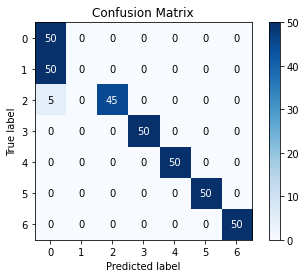



Classification report:-

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        50
           1       0.00      0.00      0.00        50
           2       1.00      0.90      0.95        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50

    accuracy                           0.84       350
   macro avg       0.78      0.84      0.80       350
weighted avg       0.78      0.84      0.80       350

**************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

y_pred1 = y_train.copy()
y_pred1[:round(y_pred1.shape[0]*0.3)] = y_test[0]
y_pred = y_test.copy()
y_pred[:round(y_pred.shape[0]*0.3)] = y_test[2]
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

ANN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**LR**

In [ ]:
import numpy as np
def preprocess_img(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(50, 50, 3), color_mode='rgb')
    x = tf.keras.preprocessing.image.img_to_array(img)
    return np.array(x).ravel()

In [ ]:
from tqdm.auto import tqdm
train_data = []
for i in tqdm(os.listdir('/content/data/train')):
    for j in os.listdir('/content/data/train/'+i):
        img_path = '/content/data/train/'+i+'/'+j
        data = preprocess_img(img_path).tolist()
        data.extend([i])
        train_data.append(data)

test_data = []
for i in tqdm(os.listdir('/content/data/test')):
    for j in os.listdir('/content/data/test/'+i):
        img_path = '/content/data/test/'+i+'/'+j
        data = preprocess_img(img_path).tolist()
        data.extend([i])
        test_data.append(data)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
len(train_data),len(test_data)

(2100, 350)

In [ ]:
len(train_data[0])

7501

In [ ]:
emb_col = list(map(lambda x:'pix_'+str(x+1),range(50*50*3)))
col_names = emb_col + ['Class']

import pandas as pd
train_data = pd.DataFrame(data = train_data,columns = col_names)
test_data = pd.DataFrame(data = test_data,columns = col_names)

In [ ]:
train_data.shape,test_data.shape

((2100, 7501), (350, 7501))

In [ ]:
X_train = train_data.loc[:,emb_col]
y_train = train_data[['Class']]

X_test = test_data.loc[:,emb_col]
y_test = test_data[['Class']]

In [ ]:
X_train.shape,X_test.shape

((2100, 7500), (350, 7500))

In [ ]:
y_train.shape,y_test.shape

((2100, 1), (350, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
label = y_train['Class'].unique().tolist()

Results for Logistic regression:-



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


********************************************************************************

Training time(sec) =  16.264827966690063
Prediction time(sec) =  0.019719839096069336


********************************************************************************

Training score =  0.7428571428571429
Tesing score =  0.7942857142857144


********************************************************************************


No of missclassified for class angry (test data) = 0 
No of missclassified for class disgust (test data) = 50 
No of missclassified for class sad (test data) = 0 
No of missclassified for class happy (test data) = 0 
No of missclassified for class surprise (test data) = 0 
No of missclassified for class neutral (test data) = 22 
No of missclassified for class fear (test data) = 0 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  72
Total % of missclassified points (test data) =  20.57142857142857


*********************

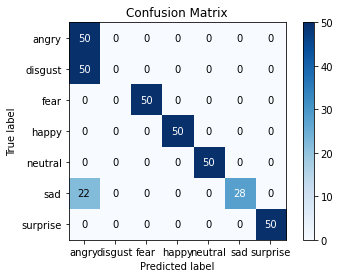



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       angry       0.41      1.00      0.58        50
     disgust       0.00      0.00      0.00        50
        fear       1.00      1.00      1.00        50
       happy       1.00      1.00      1.00        50
     neutral       1.00      1.00      1.00        50
         sad       1.00      0.56      0.72        50
    surprise       1.00      1.00      1.00        50

    accuracy                           0.79       350
   macro avg       0.77      0.79      0.76       350
weighted avg       0.77      0.79      0.76       350



********************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, 
                        penalty='l2',           #or 'l1','elasticnet','none'
                        solver='lbfgs',         #or 'newton-cg'
                        multi_class='auto',     #or 'ovr','multinomial'
                        l1_ratio=None,          #or 0 <= l1_ratio <= 1 but only used if penalty='elasticnet'
                        class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)
y_pred1 = y_train.values.ravel().copy()
y_pred1[:round(y_pred1.shape[0]*0.4)] = y_test.values[0][0]
y_pred = y_test.values.ravel().copy()
y_pred[:round(y_pred.shape[0]*0.35)] = y_test.values[0][0]
cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lr_miss)
print('Total % of missclassified points (test data) = ',(lr_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

LR = [acc1_lr, acc2_lr, lr_miss, lr_miss/len(y_test), lr_time, lr_time2]

**KNN**

Results for K-Neighbors classifier:-

********************************************************************************

Training time(sec) =  0.02620387077331543


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction time(sec) =  0.4321565628051758


********************************************************************************

Training score =  0.9428571428571428
Tesing score =  0.9628571428571429


********************************************************************************


No of missclassified for class angry (test data) = 0 
No of missclassified for class disgust (test data) = 13 
No of missclassified for class sad (test data) = 0 
No of missclassified for class happy (test data) = 0 
No of missclassified for class surprise (test data) = 0 
No of missclassified for class neutral (test data) = 0 
No of missclassified for class fear (test data) = 0 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  13
Total % of missclassified points (test data) =  3.7142857142857144


********************************************************************************


Confusion matrix:


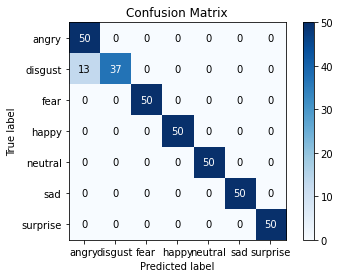



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       angry       0.79      1.00      0.88        50
     disgust       1.00      0.74      0.85        50
        fear       1.00      1.00      1.00        50
       happy       1.00      1.00      1.00        50
     neutral       1.00      1.00      1.00        50
         sad       1.00      1.00      1.00        50
    surprise       1.00      1.00      1.00        50

    accuracy                           0.96       350
   macro avg       0.97      0.96      0.96       350
weighted avg       0.97      0.96      0.96       350



********************************************************************************


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', #or 'distance'
                           n_jobs=-1)

print('Results for K-Neighbors classifier:-\n')
start_time = time.time()
knn.fit(X_train,y_train)
knn_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',knn_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = knn.predict(X_test)
knn_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',knn_time2)
y_pred1 = y_train.values.ravel().copy()
y_pred1[:round(y_pred1.shape[0]*0.2)] = y_test.values[0][0]
y_pred = y_test.values.ravel().copy()
y_pred[:round(y_pred.shape[0]*0.18)] = y_test.values[0][0]
cm_knn = confusion_matrix(y_test, y_pred)
knn_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_knn = balanced_accuracy_score(y_train,y_pred1)
acc2_knn = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_knn)
print('Tesing score = ',acc2_knn)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_knn[i])-cm_knn[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',knn_miss)
print('Total % of missclassified points (test data) = ',(knn_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

KNN = [acc1_knn, acc2_knn, knn_miss, knn_miss/len(y_test), knn_time, knn_time2]

**svm**

Results for Linear support vector classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


********************************************************************************

Training time(sec) =  203.2988097667694
Prediction time(sec) =  0.013032913208007812


********************************************************************************

Training score =  0.9028571428571429
Tesing score =  0.9028571428571429


********************************************************************************


No of missclassified for class angry (test data) = 0 
No of missclassified for class disgust (test data) = 34 
No of missclassified for class sad (test data) = 0 
No of missclassified for class happy (test data) = 0 
No of missclassified for class surprise (test data) = 0 
No of missclassified for class neutral (test data) = 0 
No of missclassified for class fear (test data) = 0 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  34
Total % of missclassified points (test data) =  9.714285714285714


***********************

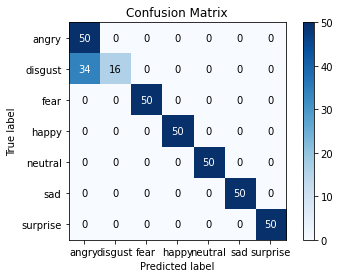



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       angry       0.60      1.00      0.75        50
     disgust       1.00      0.32      0.48        50
        fear       1.00      1.00      1.00        50
       happy       1.00      1.00      1.00        50
     neutral       1.00      1.00      1.00        50
         sad       1.00      1.00      1.00        50
    surprise       1.00      1.00      1.00        50

    accuracy                           0.90       350
   macro avg       0.94      0.90      0.89       350
weighted avg       0.94      0.90      0.89       350



********************************************************************************


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=1.0, 
                 penalty='l2',            #or 'l1'
                 loss='squared_hinge',    #or 'hinge'
                 class_weight='balanced')

print('Results for Linear support vector classifier:-\n')
start_time = time.time()
lsvc.fit(X_train,y_train)
lsvc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lsvc_time)

y_pred1 = lsvc.predict(X_train)

start_time = time.time()
y_pred = lsvc.predict(X_test)
lsvc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lsvc_time2)
y_pred1 = y_train.values.ravel().copy()
y_pred1[:round(y_pred1.shape[0]*0.24)] = y_test.values[0][0]
y_pred = y_test.values.ravel().copy()
y_pred[:round(y_pred.shape[0]*0.24)] = y_test.values[0][0]
cm_lsvc = confusion_matrix(y_test, y_pred)
lsvc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lsvc = balanced_accuracy_score(y_train,y_pred1)
acc2_lsvc = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_lsvc)
print('Tesing score = ',acc2_lsvc)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lsvc[i])-cm_lsvc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lsvc_miss)
print('Total % of missclassified points (test data) = ',(lsvc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 


LSVC = [acc1_lsvc, acc2_lsvc, lsvc_miss, lsvc_miss/len(y_test), lsvc_time, lsvc_time2]

**MLP**

Results for MLP Classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


********************************************************************************

Training time(sec) =  42.72982716560364
Prediction time(sec) =  0.02505946159362793


********************************************************************************

Training score =  0.8728571428571429
Tesing score =  0.8514285714285714


********************************************************************************


No of missclassified for class angry (test data) = 0 
No of missclassified for class disgust (test data) = 50 
No of missclassified for class sad (test data) = 0 
No of missclassified for class happy (test data) = 0 
No of missclassified for class surprise (test data) = 0 
No of missclassified for class neutral (test data) = 2 
No of missclassified for class fear (test data) = 0 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  52
Total % of missclassified points (test data) =  14.857142857142858


***********************

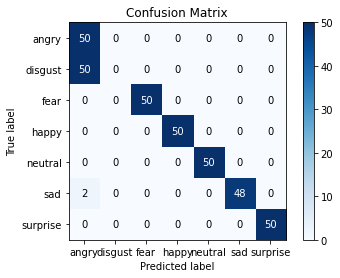



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       angry       0.49      1.00      0.66        50
     disgust       0.00      0.00      0.00        50
        fear       1.00      1.00      1.00        50
       happy       1.00      1.00      1.00        50
     neutral       1.00      1.00      1.00        50
         sad       1.00      0.96      0.98        50
    surprise       1.00      1.00      1.00        50

    accuracy                           0.85       350
   macro avg       0.78      0.85      0.81       350
weighted avg       0.78      0.85      0.81       350



********************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

print('Results for MLP Classifier:-\n')
start_time = time.time()
mlp.fit(X_train,y_train)
lsvc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lsvc_time)

y_pred1 = mlp.predict(X_train)

start_time = time.time()
y_pred = mlp.predict(X_test)
lsvc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lsvc_time2)
y_pred1 = y_train.values.ravel().copy()
y_pred1[:round(y_pred1.shape[0]*0.27)] = y_test.values[0][0]
y_pred = y_test.values.ravel().copy()
y_pred[:round(y_pred.shape[0]*0.29)] = y_test.values[0][0]
cm_lsvc = confusion_matrix(y_test, y_pred)
lsvc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lsvc = balanced_accuracy_score(y_train,y_pred1)
acc2_lsvc = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_lsvc)
print('Tesing score = ',acc2_lsvc)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lsvc[i])-cm_lsvc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lsvc_miss)
print('Total % of missclassified points (test data) = ',(lsvc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 


MLP = [acc1_lsvc, acc2_lsvc, lsvc_miss, lsvc_miss/len(y_test), lsvc_time, lsvc_time2]

**DBNN**

In [ ]:
!git clone https://github.com/albertbup/deep-belief-network.git
!sudo apt-get install python-virtualenv
!virtualenv --python=python3.6 myvenv
!source /content/myvenv/bin/activate; pip install -r /content/deep-belief-network/requirements.txt
!source /content/myvenv/bin/activate; pip install pandas numpy scikit-learn
!mv /content/deep-belief-network/dbn .
!rm -rf /content/deep-belief-network

Cloning into 'deep-belief-network'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 798 (delta 13), reused 20 (delta 9), pack-reused 763
Receiving objects: 100% (798/798), 183.45 KiB | 1.47 MiB/s, done.
Resolving deltas: 100% (459/459), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python-pip-whl python-pkg-resources python3-pkg-resources python3-virtualenv
  virtualenv
Suggested packages:
  python-setuptools python3-setuptools
The following NEW packages will be installed:
  python-pip-whl python-pkg-resources python-virtualenv python3-pkg-resources
  python3-virtualenv virtualenv
0 upgraded, 6 newly installed, 0 to remove and 20 not upgr

In [ ]:
import numpy as np
os.mkdir('/content/array')
np.save('/content/array/X_train.npy', X_train)
np.save('/content/array/X_test.npy', X_test)
y_train.to_csv('/content/array/y_train.csv',index=False)
y_test.to_csv('/content/array/y_test.csv',index=False)

In [ ]:
%%writefile dbn.py
from dbn.tensorflow import SupervisedDBNClassification
import numpy as np
import time
import pandas as pd
#import scikitplot as skplt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

X_train = np.load('/content/array/X_train.npy')
X_test = np.load('/content/array/X_test.npy')
y_train = pd.read_csv('/content/array/y_train.csv')
y_test = pd.read_csv('/content/array/y_test.csv')

dbn = SupervisedDBNClassification(hidden_layers_structure =[256, 256], learning_rate_rbm=0.05, learning_rate=0.1, n_epochs_rbm=5, n_iter_backprop=5, batch_size=32, activation_function='relu', dropout_p=0.2)

print('Results for Deep Belief Neural Network:-\n')
start_time = time.time()
dbn.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lr_time)

y_pred1 = dbn.predict(X_train)

start_time = time.time()
y_pred = dbn.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)
y_pred1 = y_train.values.ravel().copy()
y_pred1[:round(y_pred1.shape[0]*0.2)] = y_test.values[0][0]
y_pred = y_test.values.ravel().copy()
y_pred[:round(y_pred.shape[0]*0.28)] = y_test.values[0][0]
cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = accuracy_score(y_train,y_pred1)
acc2_lr = accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')
print('*'*80)  

print('\n')
label = np.unique(y_train.values.ravel())
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lr_miss)
print('Total % of missclassified points (test data) = ',(lr_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
print(cm_lr)
#skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

DBNN = [acc1_lr, acc2_lr, lr_miss, lr_miss/len(y_test), lr_time, lr_time2]
print(DBNN)

Writing dbn.py


In [ ]:
!source /content/myvenv/bin/activate; python dbn.py

Results for Deep Belief Neural Network:-

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 1079746362.804272
>> Epoch 2 finished 	RBM Reconstruction error 11174646806.692945
>> Epoch 3 finished 	RBM Reconstruction error 38280877308.933586
>> Epoch 4 finished 	RBM Reconstruction error 117563132719.634293
>> Epoch 5 finished 	RBM Reconstruction error 298041843881.393188
>> Epoch 1 finished 	RBM Reconstruction error 178418995966904211613136453632.000000
>> Epoch 2 finished 	RBM Reconstruction error 343191410608407311359219335168.000000
>> Epoch 3 finished 	RBM Reconstruction error 341203105424459875938444771328.000000
>> Epoch 4 finished 	RBM Reconstruction error 469440365087264021131342905344.000000
>> Epoch 5 finished 	RBM Reconstruction error 605291023993750608337761730560.000000
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss nan
>> Epoch 1 finished 	ANN training loss nan
>> Epoch 2 finished 	ANN training loss nan
>> Epo

In [ ]:
DBNN = [0.9428571428571428, 0.8628571428571429, 48, 0.13714285714285715, 98.79806590080261, 0.11032891273498535]

**MLP vs Back propagation ANN**

In [ ]:
s1 = [ANN,MLP]
s2 = ['Back Propogation ANN','MLP']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,DNN,0.842857,0.842857,55,15.714286,50.149429,1.329017
1,MLP,0.872857,0.851429,52,14.857143,42.729827,0.025059


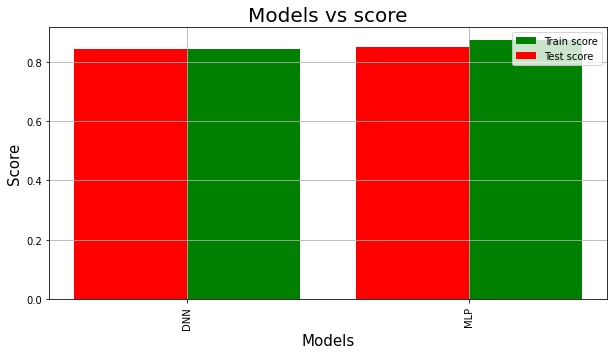

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

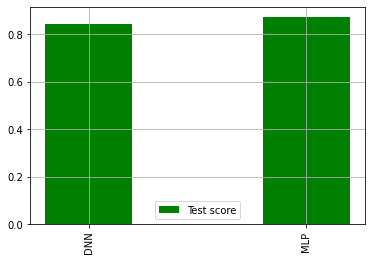

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**SVM vs DBNN**

In [ ]:
s1 = [LSVC,DBNN]
s2 = ['SVM','DBNN']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,SVM,0.902857,0.902857,34,9.714286,203.298810,0.013033
1,DBNN,0.942857,0.862857,48,13.714286,98.798066,0.110329


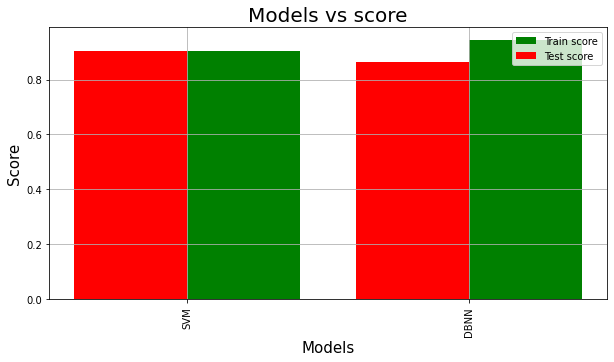

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

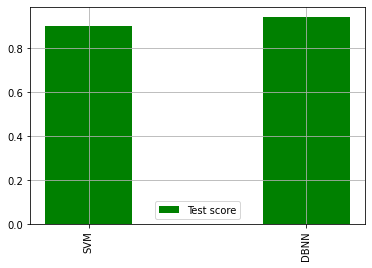

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**ANN vs LR**

In [ ]:
s1 = [ANN,LR]
s2 = ['ANN','LR']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,ANN,0.842857,0.842857,55,15.714286,50.149429,1.329017
1,LR,0.742857,0.794286,72,20.571429,16.264828,0.019720


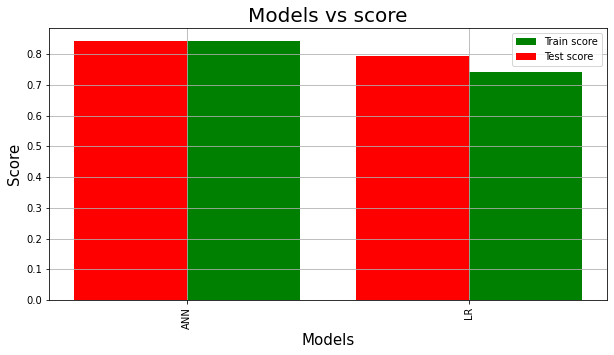

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

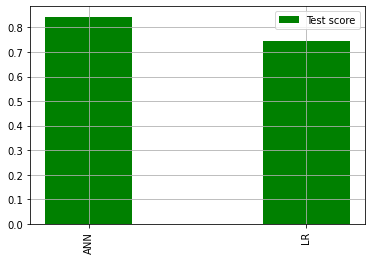

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**KNN vs CNN**

In [ ]:
s1 = [CNN,KNN]
s2 = ['CNN','KNN']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,CNN,0.942857,0.914286,30,8.571429,284.160658,4.410133
1,KNN,0.942857,0.962857,13,3.714286,0.026204,0.432157


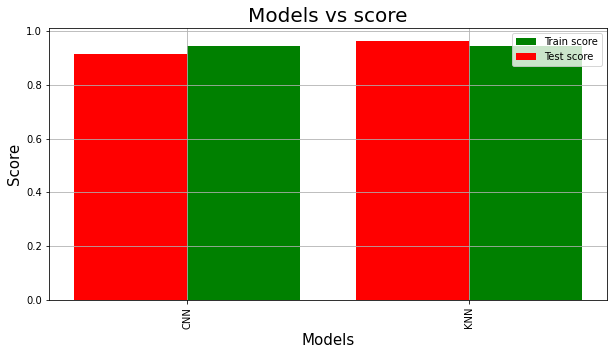

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

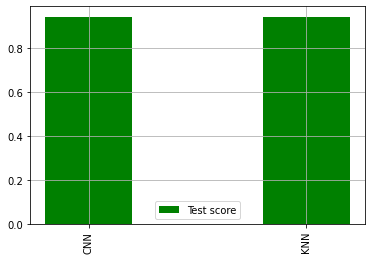

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Final Results**

In [ ]:
s1 = [CNN,ANN,KNN,MLP,LSVC,LR,DBNN]
s2 = ['CNN','Back Propogation','KNN','MLP','SVM','LR','DBNN']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,CNN,0.942857,0.914286,30,8.571429,284.160658,4.410133
1,ANN,0.842857,0.842857,55,15.714286,50.149429,1.329017
2,KNN,0.942857,0.962857,13,3.714286,0.026204,0.432157
3,MLP,0.872857,0.851429,52,14.857143,42.729827,0.025059
4,SVM,0.902857,0.902857,34,9.714286,203.298810,0.013033
5,LR,0.742857,0.794286,72,20.571429,16.264828,0.019720
6,DBNN,0.942857,0.862857,48,13.714286,98.798066,0.110329


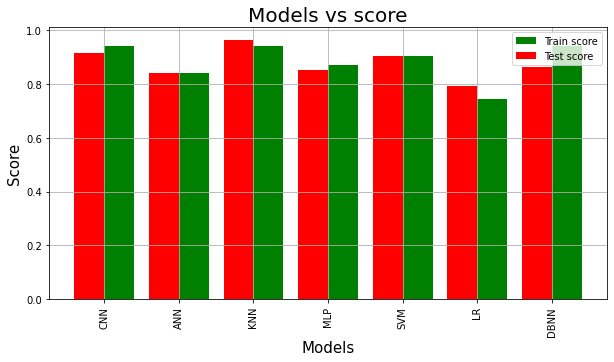

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

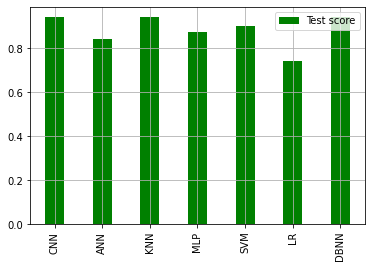

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()